In [1]:
#Programming task - Weather Data
#Description:
#1 Read the file "temperatures.csv' from the German weather service and contains timestamps and temperatures.
#2 Convert the time steps of the temperature data to 15-minutes-intervals, using interpolation.
#3 Find the hottest and coldest temperature values for every year and their time of occurrence.
#4 Store this information in a human-readable file (csv or other text file or graphic).
#5 Plot the temperatures for the hottest days of each provided year onto the same axis, over time of day.
#6 Do the same for the coldest days of each year.
#7 Perform one more analysis that you find interesting on the same data.

In [2]:
#Subtask 1 - Read file "temperatures.csv", which contains timestamps and temperatures

import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np

In [3]:
temp_data = pd.read_csv("temperatures.csv")                 #read data from input file "temperatures.csv"

In [4]:
imp_data = temp_data[["Zeitstempel", "Wert"]]               #extract data 

In [5]:
#Subtask 2 - Interpolate temperature data for 15-minutes-interval

final_data = []
number_of_data = imp_data.shape[0]                                                  #size of given data
for idx in range(number_of_data-1):
    final_data.append((imp_data["Zeitstempel"][idx], imp_data["Wert"][idx]))
    delta = (imp_data["Wert"][idx+1] - imp_data["Wert"][idx] )/4
    for i in range(1,4):
        #print(imp_data["Zeitstempel"][idx]+15*i, round(imp_data["Wert"][idx] + delta * i,5))
        final_data.append((imp_data["Zeitstempel"][idx]+15*i, round(imp_data["Wert"][idx] + delta * i,5)))

In [6]:
save_df = pd.DataFrame(final_data, columns=["Zeitstempel", "Wert"])               #List of interpolated data

In [7]:
save_df.to_csv("output.csv", index=False)                   #Interpolated temperature data saved in file "output.csv"

In [8]:
save_df

,Zeitstempel,Wert
0,201501010000,3.400
1,201501010015,3.325
2,201501010030,3.250
3,201501010045,3.175
4,201501010100,3.100
...,...,...
180663,202002252145,4.200
180664,202002252200,3.800
180665,202002252215,3.750
180666,202002252230,3.700


In [9]:
#Subtask 3 - hottest and coldest temperature values for every year and their time of occurrence

# split entire csv to individual year csv
df_rest = save_df
year_df = {}
for year in range(2015,2020):
    df_this_year, df_rest = [x for _, x in df_rest.groupby(df_rest['Zeitstempel'] >= (year+1)*100000000)]
    year_df[year] = df_this_year
year_df[2020] = df_rest                                         #expilicitly assign remaining data in df_rest to year_df[2020]

In [10]:
Coldest_val = []
Hottest_val = []
Hottest_days = []
Coldest_days = []
for year in range(2015,2021):    
    # for maximum temprature
    max_val = year_df[year].loc[year_df[year]['Wert'].idxmax()]
    
    #string manipulation for getting year, month, day & hour
    this = max_val[0]
    this_val = str(this)
    month = this_val[4:6]
    day = this_val[6:8]
    hour = this_val[8:10]
    minute = this_val[10:12]
    print(year,"/", month,"/", day,"-", hour,":",minute,"hrs - Max Temp:", max_val[1])
    Hottest_val.append(max_val[1])                                         # max. temp. for hottest days
    Hottest_days.append(max_val[0])                                        # date & time of occurence - hottest days
    
    # for minimum temprature
    min_val = year_df[year].loc[year_df[year]['Wert'].idxmin()]
    
    this = min_val[0]
    this_val = str(this)
    month = this_val[4:6]
    day = this_val[6:8]
    hour = this_val[8:10]
    minute = this_val[10:12]
    Coldest_val.append(min_val[1])                                         # min. temp. for coldest days
    Coldest_days.append(min_val[0])                                        # date & time of occurence - coldest days
    print(year,"/", month,"/", day,"-", hour,":",minute,"hrs - Min Temp:", min_val[1])
    print("----------------------------")
   

  #SSubtask 4 - store the information in a human-readable file (csv or other text file or graphic)
  #Text file for hottest and coldest temperature values for every year and their time of occurrence stored --"Output1_h&c.txt"

2015 / 07 / 04 - 14 : 00 hrs - Max Temp: 36.0
2015 / 02 / 07 - 04 : 00 hrs - Min Temp: -6.6
----------------------------
2016 / 08 / 28 - 14 : 00 hrs - Max Temp: 34.0
2016 / 01 / 22 - 02 : 00 hrs - Min Temp: -12.0
----------------------------
2017 / 06 / 22 - 11 : 00 hrs - Max Temp: 31.9
2017 / 01 / 06 - 05 : 00 hrs - Min Temp: -10.5
----------------------------
2018 / 08 / 07 - 15 : 00 hrs - Max Temp: 35.6
2018 / 03 / 02 - 06 : 00 hrs - Min Temp: -11.8
----------------------------
2019 / 07 / 25 - 13 : 00 hrs - Max Temp: 37.4
2019 / 01 / 21 - 06 : 00 hrs - Min Temp: -9.0
----------------------------
2020 / 02 / 16 - 19 : 00 hrs - Max Temp: 17.7
2020 / 01 / 01 - 08 : 00 hrs - Min Temp: -4.6
----------------------------


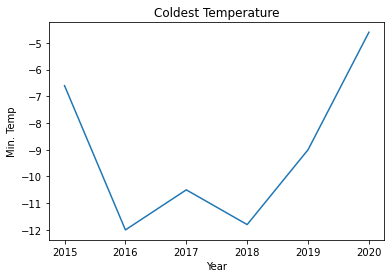

In [11]:
#Graph for coldest temperature value for every year

x = list(year_df.keys())
y = Coldest_val
plt.plot(x,y)
plt.xlabel("Year")

plt.ylabel("Min. Temp")
plt.title('Coldest Temperature')
plt.autoscale()
plt.show()

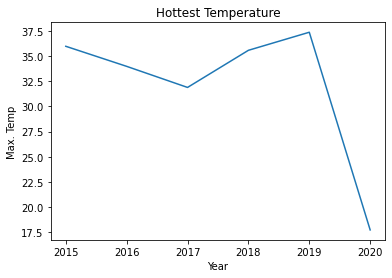

In [12]:
#Graph for coldest temperature value for every year

x = list(year_df.keys())
y = Hottest_val
plt.plot(x,y)
plt.xlabel("Year")
plt.ylabel("Max. Temp")
plt.title('Hottest Temperature')
plt.autoscale()
plt.show()

In [13]:
#Subtask 5 & 6 - Plot the temperatures for the hottest days of each provided year onto the same axis, over time of day.

#Extract teperature data for coldest & hottest days (24hrs)

Coldest_days = list(map(int, Coldest_days))
Hottest_days = list(map(int, Hottest_days))
c_days = np.zeros(6)
h_days = np.zeros(6)

In [14]:
#Date of occurence of coldest & hottest day in each year
for i in range(0,6):
    c_days[i] = math.floor(Coldest_days[i]/10000)  
    h_days[i] = math.floor(Hottest_days[i]/10000)  

In [15]:
#Extract temperature data for each time interval on coldest & hottest day in each year
df_all_days = save_df
n = df_all_days.shape[0]                                                            #size of interpolated data
df_all_days0 = {}
df_all_days1 = df_all_days['Zeitstempel']
df_all_days2 = df_all_days['Wert']
for i in range(0,n-1):
    df_all_days0[i] = math.floor(df_all_days['Zeitstempel'][i]/10000)


In [16]:
#Store temperature value & date of occurence value for each timestep in *_val_df &  *_days_df respectively
#for coldest & date of occurence value
c_days_df = []
c_val_df = []
for i in range(0,6):
    for j in range(0,n-1):
        if c_days[i] == df_all_days0[j]:
            c_days_df.append(df_all_days1[j]) 
            c_val_df.append(df_all_days2[j])
              

In [17]:
#for hottest & date of occurence value
h_days_df = []
h_val_df = []
for i in range(0,6):
    for j in range(0,n-1):
        if h_days[i] == df_all_days0[j]:
            h_days_df.append(df_all_days1[j])
            h_val_df.append(df_all_days2[j])
              

In [18]:
#Label for x-axis
this_time = []
hours = 0
minutes = 0
for i in range(0,24):
    for j in range(0,4):
        day_time = str(i).zfill(2)+":"+str(j*15).zfill(2)
        this_time.append(day_time)
        

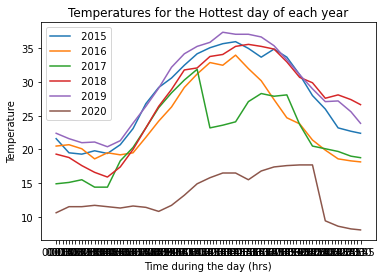

In [19]:
#5 Graph - temperatures for the hottest days of each provided year onto the same axis, over time of day
x = this_time
y = h_val_df
for i in range(0,6):
    plt.plot(x, y[96*i:96*i+96], label = " "+str(2015+i))
    
plt.xlabel("Time during the day (hrs)")
plt.ylabel("Temperature")
plt.title('Temperatures for the Hottest day of each year')
plt.legend()
plt.show()

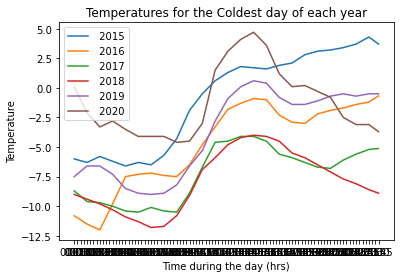

In [20]:
#6 Graph - temperatures for the coldest days of each provided year onto the same axis, over time of day

x = this_time
y = c_val_df
for i in range(0,6):
    plt.plot(x, y[96*i:96*i+96], label = " "+str(2015+i))
    
plt.xlabel("Time during the day (hrs)")
plt.ylabel("Temperature")
plt.title('Temperatures for the Coldest day of each year')
plt.legend()
plt.show()

In [21]:
#Subtask 7 - Average temperature on Coldest & Hottest day of each year

avg_temp_c = np.zeros(6)
avg_temp_h = np.zeros(6)
for i in range(0,6):
    avg_temp_c[i] = np.average(c_val_df[96*i:96*i+96])
    avg_temp_h[i] = np.average(h_val_df[96*i:96*i+96])

In [24]:
print(" Average temperature on Coldest day of each year (2015-2020) = \n",avg_temp_c)
print(" Average temperature on Hottest day of each year (2015-2020) = \n",avg_temp_h)

 Average temperature on Coldest day of each year (2015-2020) =  [-0.8765625  -4.72239583 -7.25625    -7.82916667 -3.76979167 -1.2       ]
 Average temperature on Hottest day of each year (2015-2020) =  [28.00260417 24.4        22.484375   27.3484375  29.25572917 13.26770833]


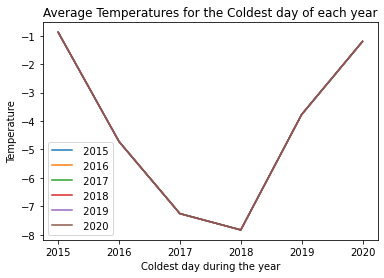

In [25]:
#7.1 Graph for Average temperature on Coldest day of each year

x = list(year_df.keys())
y = avg_temp_c
for i in range(0,6):
    plt.plot(x, y, label = " "+str(2015+i))
    
plt.xlabel("Coldest day during the year")
plt.ylabel("Temperature")
plt.title('Average Temperatures for the Coldest day of each year')
plt.legend()
plt.show()

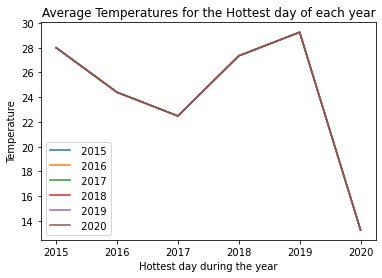

In [26]:
#7.2 Graph for Average temperature on Hottest day of each year

x = list(year_df.keys())
y = avg_temp_h
for i in range(0,6):
    plt.plot(x, y, label = " "+str(2015+i))
    
plt.xlabel("Hottest day during the year")
plt.ylabel("Temperature")
plt.title('Average Temperatures for the Hottest day of each year')
plt.legend()
plt.show()